In [6]:
from transformers import AutoTokenizer

from datasets import DatasetDict

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
splits = DatasetDict.load_from_disk("../datasets/tokenized/bert-base-uncased/QQP-Official")

In [7]:
splits

DatasetDict({
    train: Dataset({
        features: ['input_id_x', 'input_id_y', 'input_ids', 'input_mask', 'padding_mask'],
        num_rows: 144715
    })
    valid: Dataset({
        features: ['input_id_x', 'input_id_y', 'input_ids', 'input_mask', 'padding_mask'],
        num_rows: 2048
    })
    test: Dataset({
        features: ['input_id_x', 'input_id_y', 'input_ids', 'input_mask', 'padding_mask'],
        num_rows: 100
    })
})

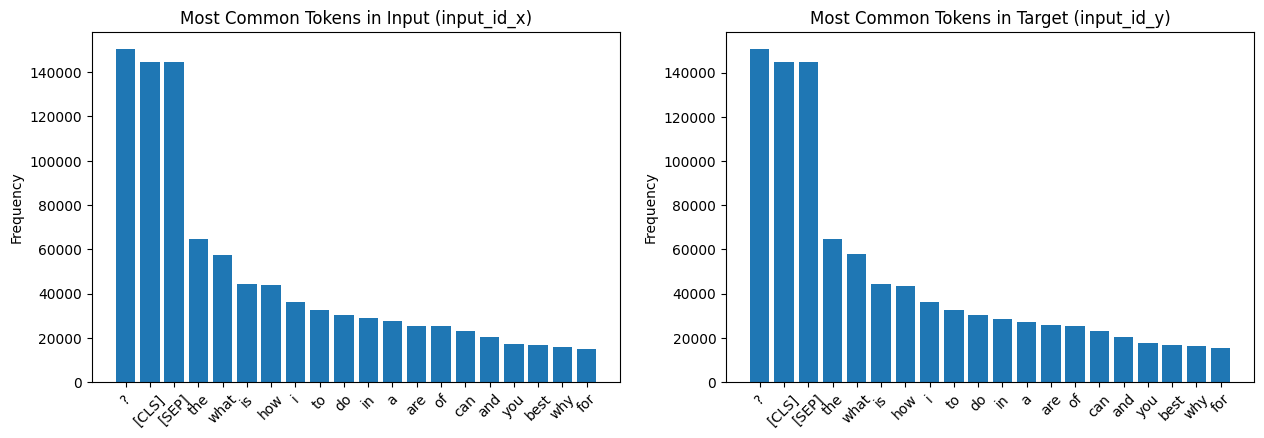

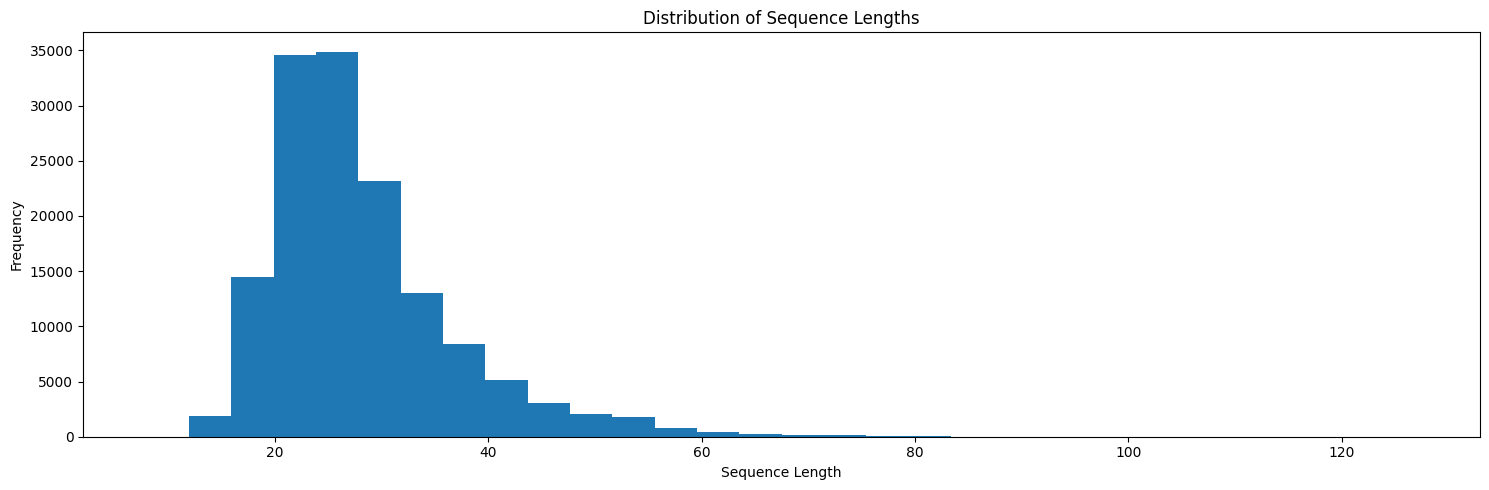

In [8]:
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np


# Function to get token frequencies and convert to words
def get_token_frequencies(dataset, field, tokenizer, top_n=20):
    all_tokens = []
    for example in dataset:
        all_tokens.extend(example[field])

    # Count frequencies
    token_counts = Counter(all_tokens)
    # Get most common tokens
    most_common = token_counts.most_common(top_n)
    # Convert token IDs to words
    words = [tokenizer.decode([token]) for token, _ in most_common]
    frequencies = [count for _, count in most_common]

    return words, frequencies


# Function to get sequence lengths from padding mask
def get_sequence_lengths(dataset, mask_field):
    lengths = []
    for example in dataset[mask_field]:
        # Count number of 1s in padding mask (non-padding tokens)
        length = sum(1 for x in example if x == 1)
        lengths.append(length)
    return lengths


# Create figure for token frequencies
plt.figure(figsize=(15, 10))

# Plot for input_id_x (input)
words_x, freqs_x = get_token_frequencies(splits["train"], "input_id_x", tokenizer)
plt.subplot(2, 2, 1)
plt.bar(words_x, freqs_x)
plt.title("Most Common Tokens in Input (input_id_x)")
plt.xticks(rotation=45)
plt.ylabel("Frequency")

# Plot for input_id_y (target)
words_y, freqs_y = get_token_frequencies(splits["train"], "input_id_y", tokenizer)
plt.subplot(2, 2, 2)
plt.bar(words_y, freqs_y)
plt.title("Most Common Tokens in Target (input_id_y)")
plt.xticks(rotation=45)
plt.ylabel("Frequency")

# Create figure for sequence lengths
plt.figure(figsize=(15, 5))

# Sequence lengths for input_ids using padding_mask
lengths = get_sequence_lengths(splits["train"], "padding_mask")
plt.hist(lengths, bins=30)
plt.title("Distribution of Sequence Lengths")
plt.xlabel("Sequence Length")
plt.ylabel("Frequency")

# Adjust layout and display
plt.tight_layout()
plt.show()

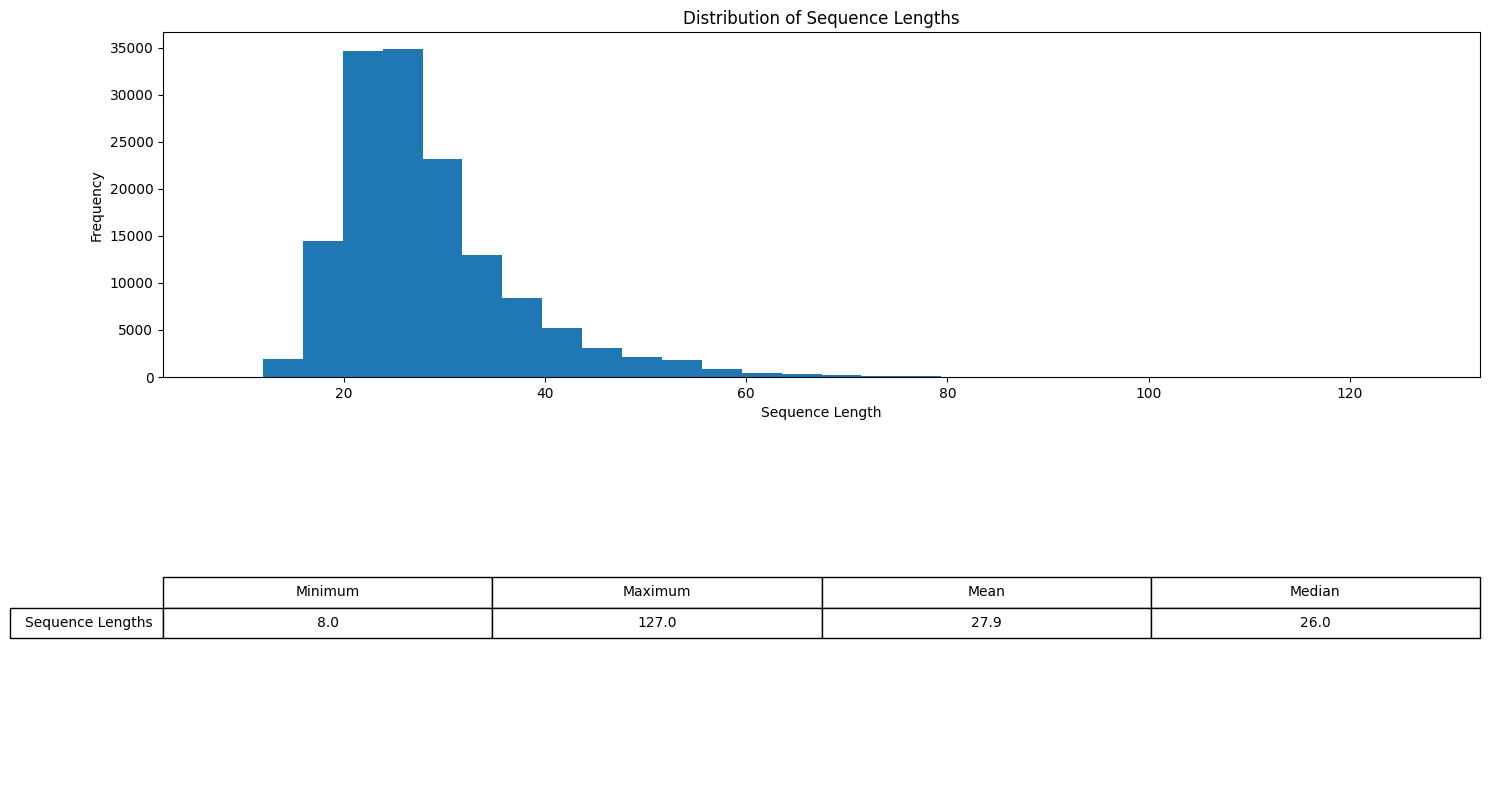

In [13]:
import pandas as pd

stats = {
    "Minimum": np.min(lengths),
    "Maximum": np.max(lengths),
    "Mean": np.mean(lengths),
    "Median": np.median(lengths),
}

# Create DataFrame for nice table display
stats_df = pd.DataFrame(stats, index=["Sequence Lengths"]).round(2)

# Create figure for sequence lengths with histogram and table
plt.figure(figsize=(15, 8))

# Histogram
plt.subplot(2, 1, 1)
plt.hist(lengths, bins=30)
plt.title("Distribution of Sequence Lengths")
plt.xlabel("Sequence Length")
plt.ylabel("Frequency")

# Table
plt.subplot(2, 1, 2)
plt.axis("off")
table = plt.table(
    cellText=stats_df.values,
    rowLabels=stats_df.index,
    colLabels=stats_df.columns,
    cellLoc="center",
    loc="center",
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

# Adjust layout and display
plt.tight_layout()
plt.show()

In [12]:
print("\nSequence Length Statistics:")
stats_df


Sequence Length Statistics:


,Minimum,Maximum,Mean,Median
Sequence Lengths,8,127,27.9,26.0
